In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, Conv1D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.15.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = datasets.load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify = y)

In [10]:
X_train.shape

(455, 30)

In [11]:
X_test.shape

(114, 30)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)
X_train.shape

(455, 30, 1)

In [14]:
X_test.shape

(114, 30, 1)

In [15]:
epochs = 50
model = Sequential()

In [16]:
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, Conv1D, Dense, Flatten

In [17]:
model.add(Conv1D(filters=32, kernel_size = 2, activation='relu', input_shape=(30,1)))

model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size = 2, activation='relu'))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 64)                114752    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [20]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history  =model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 7s 42ms/step - loss: 0.3773 - accuracy: 0.8923 - val_loss: 0.1726 - val_accuracy: 0.9474
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1441 - accuracy: 0.9473 - val_loss: 0.1324 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1032 - accuracy: 0.9560 - val_loss: 0.1214 - val_accuracy: 0.9474
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0792 - accuracy: 0.9758 - val_loss: 0.1078 - val_accuracy: 0.9737
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0663 - accuracy: 0.9780 - val_loss: 0.1083 - val_accuracy: 0.9649
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0638 - accuracy: 0.9824 - val_loss: 0.1084 - val_accuracy: 0.9649
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0672 - accuracy: 0.9802 - val_loss: 0.1044 - val_accuracy: 0.9649
Epoch 8/50
15/15 [=

In [22]:
def plot_learningCurve(history, epoch):
  #Plot training and validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()


  #Plot training and validation loss values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

In [23]:
history.history

{'loss': [0.3772876560688019,
  0.14408226311206818,
  0.10320864617824554,
  0.0792393609881401,
  0.06625249236822128,
  0.06375303864479065,
  0.06717675179243088,
  0.06357225030660629,
  0.056071601808071136,
  0.052485279738903046,
  0.042998626828193665,
  0.05287548527121544,
  0.05910960212349892,
  0.054370760917663574,
  0.04509463161230087,
  0.03525901958346367,
  0.053441017866134644,
  0.04288734868168831,
  0.028955427929759026,
  0.039982616901397705,
  0.036140114068984985,
  0.02873004600405693,
  0.042577262967824936,
  0.048420894891023636,
  0.022681213915348053,
  0.037661392241716385,
  0.049282774329185486,
  0.05651174113154411,
  0.03352699428796768,
  0.038867395371198654,
  0.04484061896800995,
  0.027925051748752594,
  0.03189464658498764,
  0.027528678998351097,
  0.023141328245401382,
  0.028286051005125046,
  0.016661513596773148,
  0.02153684012591839,
  0.027387769892811775,
  0.02748168259859085,
  0.017264872789382935,
  0.024701843038201332,
  0.03

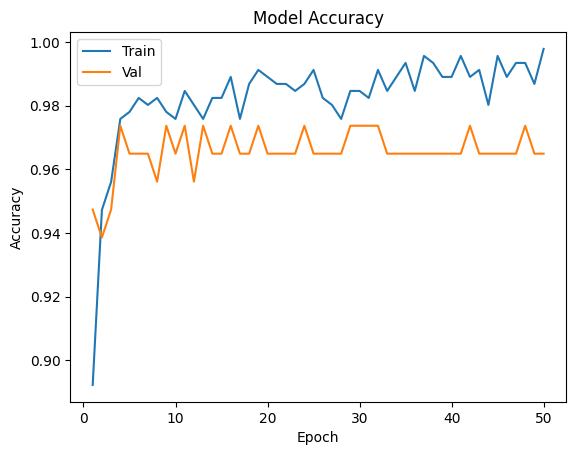

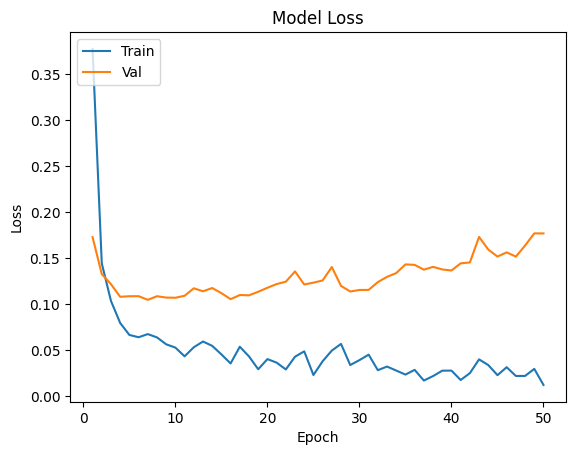

In [24]:
plot_learningCurve(history, epochs)